<a href="https://colab.research.google.com/github/tahreemrasul/multimodal_rag/blob/main/multimodal_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal Retrieval Augmented Generation (RAG) using Gemini API in Vertex AI

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retrieval-augmented-generation/intro_multimodal_rag.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retrieval-augmented-generation/intro_multimodal_rag.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>  
</table>

| | |
|-|-|
|Author(s) | [Tahreem Rasul](https://github.com/tahreemrasul) |

# Overview

Multimodal RAG offers several advantages over text-based RAG:

* **Enhanced knowledge access:** Multimodal RAG can access and process both textual and visual information, providing a richer and more comprehensive knowledge base for the LLM.
* **Improved reasoning capabilities:** By incorporating visual cues, multimodal RAG can make better informed inferences across different types of data modalities.

This notebook shows you how to use RAG with Gemini API in Vertex AI, text embeddings, and multimodal embeddings, to build a document search engine.

Through hands-on examples, you will discover how to construct a multimedia-rich metadata repository of your document sources, enabling search, comparison, and reasoning across diverse information streams.

**Objectives**

This notebook provides a guide to building a document search engine using multimodal retrieval augmented generation (RAG), step by step:

* Data loading using LangChain document_loaders
* Generate text summaries using Google's gemini-pro model
* Generate image summaries using Google's gemini-pro-vision model
* Create multi-vector retrieval using Google's textembedding-gecko model with Croma Db as vector store
* Develop Multi-modal RAG chain for question answering

# Building Multi-Modal RAG
This codelab uses [Vertex AI SDK for Python](https://cloud.google.com/vertex-ai/docs/python-sdk/use-vertex-ai-python-sdk) and [Langchain](https://www.langchain.com/) to demonstrate how to implement the ‘Option 2' described [here](https://github.com/langchain-ai/langchain/blob/master/cookbook/Multi_modal_RAG.ipynb) with Google Cloud.

You can refer to the full code in the file [Multi-modal RAG with Google Cloud](https://github.com/langchain-ai/langchain/blob/master/cookbook/Multi_modal_RAG_google.ipynb) from the [referenced repository](https://github.com/langchain-ai/langchain/tree/master/cookbook).

# Before You Begin


<div class="alert alert-block alert-warning">
<b>⚠️ To follow along in this workshop, you need to have a Google Cloud project setup with a valid billing account added.⚠️</b>
</div>

To create a new Google Cloud project, follow these steps:

1. Go to Google Cloud Console, and log in with your gmail account.
2. Create a new project, or select an existing project. We will be using the Project ID of the project you are using in the next steps. Here is a screenshot of the process:
![link](https://storage.cloud.google.com/doc_processing_storage/1.png)
3. Once you have created/selected a project, it needs to have a valid Billing account added for you to be able to use it. You would need to add your Credit Card info in this step. Ensure that billing is enabled for your Google Cloud project. Learn how to [check if billing is enabled on a project](https://cloud.google.com/billing/docs/how-to/verify-billing-enabled).
![link](https://storage.cloud.google.com/doc_processing_storage/2.png)
![link](https://storage.cloud.google.com/doc_processing_storage/3.png)
4. Enable [all recommended APIs](https://cloud.google.com/vertex-ai/docs/start/cloud-environment) from Vertex AI dashboard
5. Open Colab Notebook and login to the same account as your current active Google Cloud account.

# Step 1: Install and Import dependencies

In [ ]:
!pip install -U --quiet langchain langchain_community chromadb  langchain-google-vertexai
!pip install --quiet "unstructured[all-docs]" pypdf pillow pydantic lxml pillow matplotlib chromadb tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 25.2 MB/s eta 0:00:

### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [ ]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>



### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench) or [Colab Enterprise](https://cloud.google.com/colab/docs).

In [ ]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Define Google Cloud project information

#### Project Info

In [32]:
# Define project information

import sys

PROJECT_ID = "Project ID"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on Colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: Project ID


In [ ]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

# Step 2: Prepare and load data

We use a zip file with a sub-set of the extracted images and pdf from [this blog post](https://cloudedjudgement.substack.com/p/clouded-judgement-111023).

First download the data. The code snippet below will download a zipped folder containing pdf and images from above post and extract it in a folder titled `cj` in your colab directory.

In [ ]:
import logging
import zipfile
import requests

logging.basicConfig(level=logging.INFO)

data_url = "https://storage.googleapis.com/benchmarks-artifacts/langchain-docs-benchmarking/cj.zip"
result = requests.get(data_url)
filename = "cj.zip"
with open(filename, "wb") as file:
   file.write(result.content)

with zipfile.ZipFile(filename, "r") as zip_ref:
   zip_ref.extractall()

Next, let's load the text content from the document. We will be using the **`PyPDFLoader`** wrapper from **`LangChain`**.

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("./cj/cj.pdf")
docs = loader.load()
tables = []
texts = [d.page_content for d in docs]

Check the content from the first page

In [ ]:
texts[0]

'11/14/23, 8:35 PM Clouded Judgement 11.10.23 - by Jamin Ball\nhttps://cloudedjudgement.substack.com/p/clouded-judgement-111023 1/21\nClouded Judgement 11.10.23 - OpenAI\nUpdates + Datadog Gives the All-Clear?\nJAMIN BALL\nNOV 10, 2023\n2 Share\nEvery week I’ll provide updates on the latest trends in cloud so\x00ware companies. Follow along to\nstay up to date!\nOpenAI Updates\nOpenAI had their big developer day this week, and I wanted to call out two key announcements\n(and trends): increasing context windows and decreasing costs.\nWhen I think about the monetization of AI (and which “layers” monetize \x00rst) I’ve always\nthought it would follow the below order, with each layer lagging the one that comes before it.\n1. Raw silicon (chips like Nvidia bought in large quantities to build out infra to service\nupcoming demand).\n2. Model providers (OpenAI, Anthropic, etc as companies start building out AI).\n35\nType your email... Subscribe'

Total pages in the document

In [ ]:
len(texts)

21

# Step 3: Generate Text Summaries

Import required libraries first

In [ ]:
from langchain_google_vertexai import VertexAI , ChatVertexAI , VertexAIEmbeddings
from langchain.prompts import PromptTemplate
from langchain_core.messages import AIMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda

We will be using the code below to get text summaries. Here is what we are doing:
This function, `generate_text_summaries`, performs the following tasks:

1. **Purpose**:
   - It summarizes a list of text and table elements for retrieval purposes.
   - The summaries are concise, optimized for embedding and efficient retrieval.

2. **Input Parameters**:
   - `texts`: A list of text strings to summarize.
   - `tables`: A list of table strings to summarize.
   - `summarize_texts`: A boolean flag indicating whether to summarize the `texts` list or return it as is.

3. **Components**:
   - **Prompt Template**: Defines the summarization task for text and tables, ensuring the summaries are concise and retrieval-friendly.
   - **Model**: Uses the `VertexAI` API with the "gemini-pro" model to generate summaries. A fallback mechanism ensures a default error response in case of processing issues.
   - **Summarization Chain**: Chains the input elements (`texts` or `tables`) through the prompt and model to produce summaries.

4. **Process**:
   - **Text Summaries**:
     - If `summarize_texts` is `True`, it applies the summarization chain to the `texts` list.
     - If `False`, it skips summarization and directly assigns the original `texts` to the summaries.
   - **Table Summaries**:
     - Always summarizes the `tables` list using the summarization chain if tables are provided.

5. **Outputs**:
   - Returns two lists: `text_summaries` (summaries of the text elements) and `table_summaries` (summaries of the table elements).

In [ ]:
# Generate summaries of text elements
def generate_text_summaries(texts, tables, summarize_texts=False):
   """
   Summarize text elements
   texts: List of str
   tables: List of str
   summarize_texts: Bool to summarize texts
   """

   # Prompt
   prompt_text = """You are an assistant tasked with summarizing tables and text for retrieval. \
   These summaries will be embedded and used to retrieve the raw text or table elements. \
   Give a concise summary of the table or text that is well optimized for retrieval. Table or text: {element} """
   prompt = PromptTemplate.from_template(prompt_text)
   empty_response = RunnableLambda(
       lambda x: AIMessage(content="Error processing document")
   )
   # Text summary chain
   model = VertexAI(
       temperature=0, model_name="gemini-pro", max_output_tokens=1024
   ).with_fallbacks([empty_response])
   summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

   # Initialize empty summaries
   text_summaries = []
   table_summaries = []

   # Apply to text if texts are provided and summarization is requested
   if texts and summarize_texts:
       text_summaries = summarize_chain.batch(texts, {"max_concurrency": 1})
   elif texts:
       text_summaries = texts

   # Apply to tables if tables are provided
   if tables:
       table_summaries = summarize_chain.batch(tables, {"max_concurrency": 1})

   return text_summaries, table_summaries

Get text summaries

In [ ]:
text_summaries, table_summaries = generate_text_summaries(
   texts, tables, summarize_texts=True
)

text_summaries[0]

"## Clouded Judgement 11.10.23: OpenAI Updates\n\nThis article discusses OpenAI's developer day and two key announcements: increasing context windows and decreasing costs. The author believes that the monetization of AI will follow a specific order, with raw silicon being the first to monetize, followed by model providers. \n\n**Key Points:**\n\n* OpenAI increased context windows and decreased costs.\n* The author believes AI monetization will follow a specific order, starting with raw silicon.\n* OpenAI is a model provider. \n"

# Step 4: Generate Image Summaries

Import required libraries first

In [ ]:
import base64
import os

from langchain_core.messages import HumanMessage

The following functions will generate image summaries. Here is what is going on:


1.   **`encode_image`**:
Converts an image file into a Base64-encoded string.
Reads the file in binary mode and encodes it to a Base64 string for further processing.

2. **`image_summarize`**:
Generates a summary for an image using the gemini-pro-vision model from Vertex AI.
Accepts a Base64-encoded image and a text prompt, sending them to the model for summarization.

3. **`generate_img_summaries`**:
Processes a directory of `.jpg` files, generating Base64-encoded strings and summaries for each image.
Uses encode_image to convert images and image_summarize to summarize them.
Stores and returns lists of Base64-encoded images and their corresponding summaries.

In [ ]:
def encode_image(image_path):
   """Getting the base64 string"""
   with open(image_path, "rb") as image_file:
       return base64.b64encode(image_file.read()).decode("utf-8")


def image_summarize(img_base64, prompt):
   """Make image summary"""
   model = ChatVertexAI(model_name="gemini-pro-vision", max_output_tokens=1024)

   msg = model(
       [
           HumanMessage(
               content=[
                   {"type": "text", "text": prompt},
                   {
                       "type": "image_url",
                       "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                   },
               ]
           )
       ]
   )
   return msg.content


def generate_img_summaries(path):
   """
   Generate summaries and base64 encoded strings for images
   path: Path to list of .jpg files extracted by Unstructured
   """

   # Store base64 encoded images
   img_base64_list = []

   # Store image summaries
   image_summaries = []

   # Prompt
   prompt = """You are an assistant tasked with summarizing images for retrieval. \
   These summaries will be embedded and used to retrieve the raw image. \
   Give a concise summary of the image that is well optimized for retrieval."""

   # Apply to images
   for img_file in sorted(os.listdir(path)):
       if img_file.endswith(".jpg"):
           img_path = os.path.join(path, img_file)
           base64_image = encode_image(img_path)
           img_base64_list.append(base64_image)
           image_summaries.append(image_summarize(base64_image, prompt))

   return img_base64_list, image_summaries

Generate Image Summaries

In [ ]:
img_base64_list, image_summaries = generate_img_summaries("./cj")

len(img_base64_list)

len(image_summaries)

image_summaries[0]

<ipython-input-12-1f415d3c9e39>:11: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  msg = model(


' The image shows a line chart of EV/NTM revenue multiples over time. The three lines represent different growth rates. The highest growth rate line is red, the mid growth rate line is orange, and the low growth rate line is blue. The x-axis shows time, and the y-axis shows the EV/NTM revenue multiple.'

# Step 5: Build Multi-Vector Retrieval

Let's generate text and image summaries and save them to a ChromaDB vectorstore.

Import require libraries

In [ ]:
import uuid
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document

A **multi-vector retriever** allows simultaneous indexing of multiple modalities (e.g., text, tables, images) by using their summaries for retrieval.

Queries are matched against embeddings of summaries, ensuring efficient, modality-agnostic retrieval.

When a query is executed, the retriever searches the vectorstore for the best matching summaries.
Once a match is found, the associated raw content is retrieved from the docstore using the unique ID.

Let's create a Multi-Vector Retrieval. The code below does the following:

**`create_multi_vector_retriever:`**

**Purpose:** Builds a retriever that indexes summaries (text, tables, images) and retrieves raw content when queried.

**Steps:**
1. **Initialize Storage:**
* Uses `InMemoryStore` for raw content and vectorstore for summary embeddings.
* Maps summaries to raw content with a unique `doc_id`.
2. **Create Retriever:**
* Combines vectorstore (for similarity search) and docstore (for raw content retrieval).
3. **Add Documents:**
* A helper function assigns unique IDs, stores embeddings in vectorstore, and raw data in docstore.
* Adds texts, tables, and images if summaries are available.

**Output:**
Returns the retriever for querying summaries and retrieving raw data.

In [ ]:
def create_multi_vector_retriever(
   vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images
):
   """
   Create retriever that indexes summaries, but returns raw images or texts
   """

   # Initialize the storage layer
   store = InMemoryStore()
   id_key = "doc_id"

   # Create the multi-vector retriever
   retriever = MultiVectorRetriever(
       vectorstore=vectorstore,
       docstore=store,
       id_key=id_key,
   )

   # Helper function to add documents to the vectorstore and docstore
   def add_documents(retriever, doc_summaries, doc_contents):
       doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
       summary_docs = [
           Document(page_content=s, metadata={id_key: doc_ids[i]})
           for i, s in enumerate(doc_summaries)
       ]
       retriever.vectorstore.add_documents(summary_docs)
       retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

   # Add texts, tables, and images
   # Check that text_summaries is not empty before adding
   if text_summaries:
       add_documents(retriever, text_summaries, texts)
   # Check that table_summaries is not empty before adding
   if table_summaries:
       add_documents(retriever, table_summaries, tables)
   # Check that image_summaries is not empty before adding
   if image_summaries:
       add_documents(retriever, image_summaries, images)

   return retriever

The vectorstore to use to index the summaries

In [ ]:
vectorstore = Chroma(
   collection_name="mm_rag_cj_blog",
   embedding_function=VertexAIEmbeddings(model_name="textembedding-gecko@latest"),
)

<ipython-input-16-443ac5ba790d>:2: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


Create retriever

In [ ]:
retriever_multi_vector_img = create_multi_vector_retriever(
   vectorstore,
   text_summaries,
   texts,
   table_summaries,
   tables,
   image_summaries,
   img_base64_list,
)

# Step 6: Building Multi-Modal RAG

Define utility functions

In [ ]:
import io
import re

from IPython.display import HTML, display
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from PIL import Image


def plt_img_base64(img_base64):
   """Disply base64 encoded string as image"""
   # Create an HTML img tag with the base64 string as the source
   image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
   # Display the image by rendering the HTML
   display(HTML(image_html))


def looks_like_base64(sb):
   """Check if the string looks like base64"""
   return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


def is_image_data(b64data):
   """
   Check if the base64 data is an image by looking at the start of the data
   """
   image_signatures = {
       b"\xFF\xD8\xFF": "jpg",
       b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
       b"\x47\x49\x46\x38": "gif",
       b"\x52\x49\x46\x46": "webp",
   }
   try:
       header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
       for sig, format in image_signatures.items():
           if header.startswith(sig):
               return True
       return False
   except Exception:
       return False


def resize_base64_image(base64_string, size=(128, 128)):
   """
   Resize an image encoded as a Base64 string
   """
   # Decode the Base64 string
   img_data = base64.b64decode(base64_string)
   img = Image.open(io.BytesIO(img_data))

   # Resize the image
   resized_img = img.resize(size, Image.LANCZOS)

   # Save the resized image to a bytes buffer
   buffered = io.BytesIO()
   resized_img.save(buffered, format=img.format)

   # Encode the resized image to Base64
   return base64.b64encode(buffered.getvalue()).decode("utf-8")


def split_image_text_types(docs):
   """
   Split base64-encoded images and texts
   """
   b64_images = []
   texts = []
   for doc in docs:
       # Check if the document is of type Document and extract page_content if so
       if isinstance(doc, Document):
           doc = doc.page_content
       if looks_like_base64(doc) and is_image_data(doc):
           doc = resize_base64_image(doc, size=(1300, 600))
           b64_images.append(doc)
       else:
           texts.append(doc)
   if len(b64_images) > 0:
       return {"images": b64_images[:1], "texts": []}
   return {"images": b64_images, "texts": texts}

Define domain specific image prompt

In [ ]:
def img_prompt_func(data_dict):
   """
   Join the context into a single string
   """
   formatted_texts = "\n".join(data_dict["context"]["texts"])
   messages = []

   # Adding the text for analysis
   text_message = {
       "type": "text",
       "text": (
           "You are financial analyst tasking with providing investment advice.\n"
           "You will be given a mixed of text, tables, and image(s) usually of charts or graphs.\n"
           "Use this information to provide investment advice related to the user question. \n"
           f"User-provided question: {data_dict['question']}\n\n"
           "Text and / or tables:\n"
           f"{formatted_texts}"
       ),
   }
   messages.append(text_message)
   # Adding image(s) to the messages if present
   if data_dict["context"]["images"]:
       for image in data_dict["context"]["images"]:
           image_message = {
               "type": "image_url",
               "image_url": {"url": f"data:image/jpeg;base64,{image}"},
           }
           messages.append(image_message)
   return [HumanMessage(content=messages)]


Define Multi-Modal RAG Chain

In [ ]:
def multi_modal_rag_chain(retriever):
   """
   Multi-modal RAG chain
   """

   # Multi-modal LLM
   model = ChatVertexAI(
       temperature=0, model_name="gemini-pro-vision", max_output_tokens=1024
   )

   # RAG pipeline
   chain = (
       {
           "context": retriever | RunnableLambda(split_image_text_types),
           "question": RunnablePassthrough(),
       }
       | RunnableLambda(img_prompt_func)
       | model
       | StrOutputParser()
   )

   return chain


# Create RAG chain
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

# Step 7: Test your queries

Let's first see what relevant documents we get from our database for the query below.

In [ ]:
query = "What are the EV / NTM and NTM rev growth for MongoDB, Cloudflare, and Datadog?"
docs = retriever_multi_vector_img.get_relevant_documents(query, limit=1)

# We get relevant docs
len(docs)

docs

<ipython-input-21-cca7b45f5a79>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever_multi_vector_img.get_relevant_documents(query, limit=1)


['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAKyBe0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiikJoAWim5paBXFopKM0DFopM0UALRSUZoAWim55pc0CuLQaTNFAwoNFHWgQoopBS0DCiiigAooooAKKTNGaA

In [ ]:
len(docs)

4


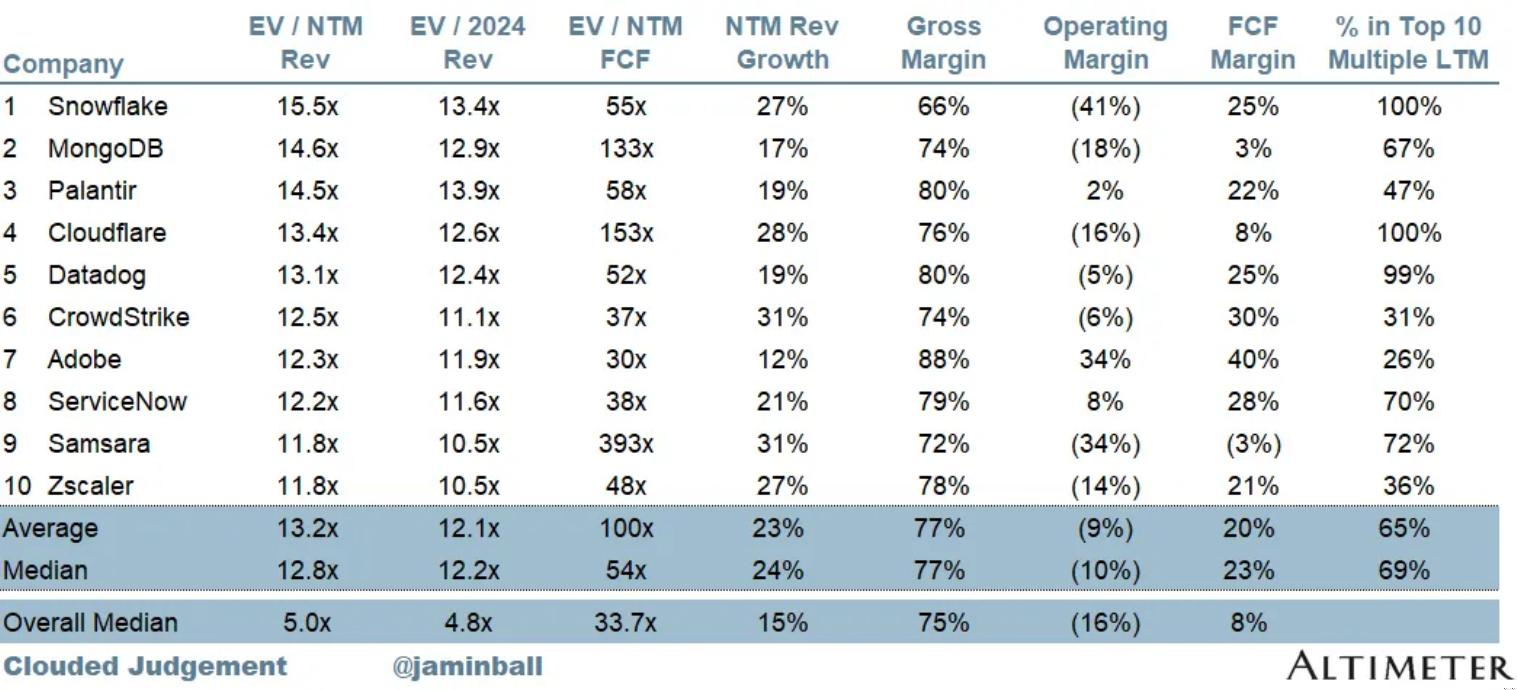

In [ ]:
plt_img_base64(docs[0])

Let's run our multimodal RAG pipeline on the same query. We will now see a comprehensive response given by the Gemini model incorporating both text and image info.

In [ ]:
result = chain_multimodal_rag.invoke(query)

In [ ]:
result = chain_multimodal_rag.invoke(query)

from IPython.display import Markdown as md
md(result)

 | Company | EV/NTM Rev | NTM Rev Growth |
|---|---|---|
| MongoDB | 14.6x | 17% |
| Cloudflare | 13.4x | 28% |
| Datadog | 13.1x | 19% |